# Exploratory Data Analysis - E-commerce Fraud Data

## Overview

This notebook performs comprehensive exploratory data analysis (EDA) on the e-commerce fraud transaction dataset (`Fraud_Data.csv`). We use modular code from the `src/` directory to:

1. Load and inspect the fraud transaction data
2. Assess data quality (missing values, duplicates, data types)
3. Clean and prepare the data
4. Perform univariate analysis (feature distributions)
5. Perform bivariate analysis (feature-target relationships)
6. Analyze class imbalance
7. Conduct temporal analysis
8. Examine categorical feature patterns

**Key Findings Summary:**
- Dataset shape and basic statistics
- Class distribution and imbalance ratio
- Feature importance for fraud detection
- Temporal patterns in fraudulent transactions

## 1. Environment Setup

Import required libraries and configure visualization settings.

In [3]:
# Standard library imports
import sys
from pathlib import Path
import warnings

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import our custom modules
sys.path.append(str(Path.cwd().parent))
from src.data_preprocessing import DataCleaner, DataLoader
from src.EDA_fraud import FraudDataEDA

# Configuration
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 10

print("✓ All libraries imported successfully")
print(f"✓ Working directory: {Path.cwd()}")

✓ All libraries imported successfully
✓ Working directory: /home/voldi/Projects/ai-ml/fraud-detection-model/notebooks


## 2. Data Loading

Load the e-commerce fraud transaction data using our DataLoader class.

In [4]:
# Initialize DataLoader
project_root = Path.cwd().parent
loader = DataLoader(data_dir=str(project_root / "data" / "raw"))

# Load fraud data
fraud_data = loader.load_fraud_data()

# Display basic information
print("=" * 70)
print("FRAUD DATA LOADED SUCCESSFULLY")
print("=" * 70)
print(f"\nDataset Shape: {fraud_data.shape[0]:,} rows × {fraud_data.shape[1]} columns")
print(f"\nFirst few rows:")
fraud_data.head()

✓ Loaded fraud data: 151112 rows, 11 columns
  Fraud cases: 14151
  Legitimate cases: 136961
FRAUD DATA LOADED SUCCESSFULLY

Dataset Shape: 151,112 rows × 11 columns

First few rows:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


### 2.1 Data Structure and Types

Examine the dataset structure, column types, and memory usage.

In [5]:
# Get detailed data information
data_info = loader.get_data_info(fraud_data)

print("\nColumn Information:")
print("-" * 70)
for col, dtype in zip(fraud_data.columns, fraud_data.dtypes):
    print(f"{col:20s} : {str(dtype):15s} ({fraud_data[col].nunique():,} unique values)")

print("\n" + "=" * 70)
fraud_data.info()


Column Information:
----------------------------------------------------------------------
user_id              : int64           (151,112 unique values)
signup_time          : object          (151,112 unique values)
purchase_time        : object          (150,679 unique values)
purchase_value       : int64           (122 unique values)
device_id            : object          (137,956 unique values)
source               : object          (3 unique values)
browser              : object          (5 unique values)
sex                  : object          (2 unique values)
age                  : int64           (58 unique values)
ip_address           : float64         (143,512 unique values)
class                : int64           (2 unique values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64 

## 3. Data Quality Assessment

Check for missing values, duplicates, and data quality issues using our DataCleaner class.

In [6]:
# Initialize DataCleaner
cleaner = DataCleaner(fraud_data)

# Check missing values
missing_report = cleaner.check_missing_values()
print("MISSING VALUES ANALYSIS")
print("=" * 70)
print(missing_report)

# Check for duplicates
duplicate_count = fraud_data.duplicated().sum()
print(f"\n\nDUPLICATE ROWS")
print("=" * 70)
print(f"Number of duplicate rows: {duplicate_count:,}")

# Check data types
print(f"\n\nDATA TYPES VALIDATION")
print("=" * 70)
expected_types = {
    "user_id": "int64",
    "signup_time": "object",
    "purchase_time": "object",
    "purchase_value": "float64",
    "device_id": "object",
    "source": "object",
    "browser": "object",
    "sex": "object",
    "age": "int64",
    "ip_address": "float64",
    "class": "int64",
}
type_validation = cleaner.validate_data_types(expected_types)
print(type_validation)

✓ No missing values found
MISSING VALUES ANALYSIS
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage, Data_Type]
Index: []


DUPLICATE ROWS
Number of duplicate rows: 0


DATA TYPES VALIDATION
✓ Converted 'purchase_value': int64 → float64
{'current_types': {'user_id': dtype('int64'), 'signup_time': dtype('O'), 'purchase_time': dtype('O'), 'purchase_value': dtype('int64'), 'device_id': dtype('O'), 'source': dtype('O'), 'browser': dtype('O'), 'sex': dtype('O'), 'age': dtype('int64'), 'ip_address': dtype('float64'), 'class': dtype('int64')}, 'mismatches': {'purchase_value': {'current': 'int64', 'expected': 'float64'}}, 'converted': ['purchase_value']}


## 4. Data Cleaning

The raw dataset is already clean based on our checks:

- Missing values: 0 across all 11 columns
- Duplicate rows: 0
- Type fixes: converted `purchase_value` from int64 → float64

Final shape after validation: 151,112 rows × 11 columns.

In [7]:
fraud_data_clean = fraud_data.copy()

## 5. Exploratory Data Analysis

Now we'll perform comprehensive EDA using our FraudDataEDA class to understand patterns in the data.

In [8]:
# Initialize FraudDataEDA
eda = FraudDataEDA(
    data=fraud_data_clean,
    target_column="class",
    output_dir=str(project_root / "reports" / "images"),
)

print("✓ FraudDataEDA initialized successfully")
print(f"✓ Visualizations will be saved to: {project_root / 'reports' / 'images'}")

✓ FraudDataEDA initialized
  Dataset shape: (151112, 11)
  Target column: class
  Output directory: /home/voldi/Projects/ai-ml/fraud-detection-model/reports/images
✓ FraudDataEDA initialized successfully
✓ Visualizations will be saved to: /home/voldi/Projects/ai-ml/fraud-detection-model/reports/images


### 5.1 Class Imbalance Analysis

Fraud vs legitimate distribution on the full dataset:

- Total transactions: 151,112
- Legitimate (Class 0): 136,961 (90.64%)
- Fraud (Class 1): 14,151 (9.36%)
- Imbalance ratio: 9.68:1 (≈ 10:1)

Plot saved to: `reports/images/class_imbalance.png`.


CLASS IMBALANCE ANALYSIS

Total transactions: 151,112

Class Distribution:
  Legitimate (0): 136,961 (90.64%)
  Fraud (1):      14,151 (9.36%)

Imbalance Ratio: 9.68:1 (Legitimate:Fraud)



✓ Saved class imbalance plot: /home/voldi/Projects/ai-ml/fraud-detection-model/reports/images/class_imbalance.png




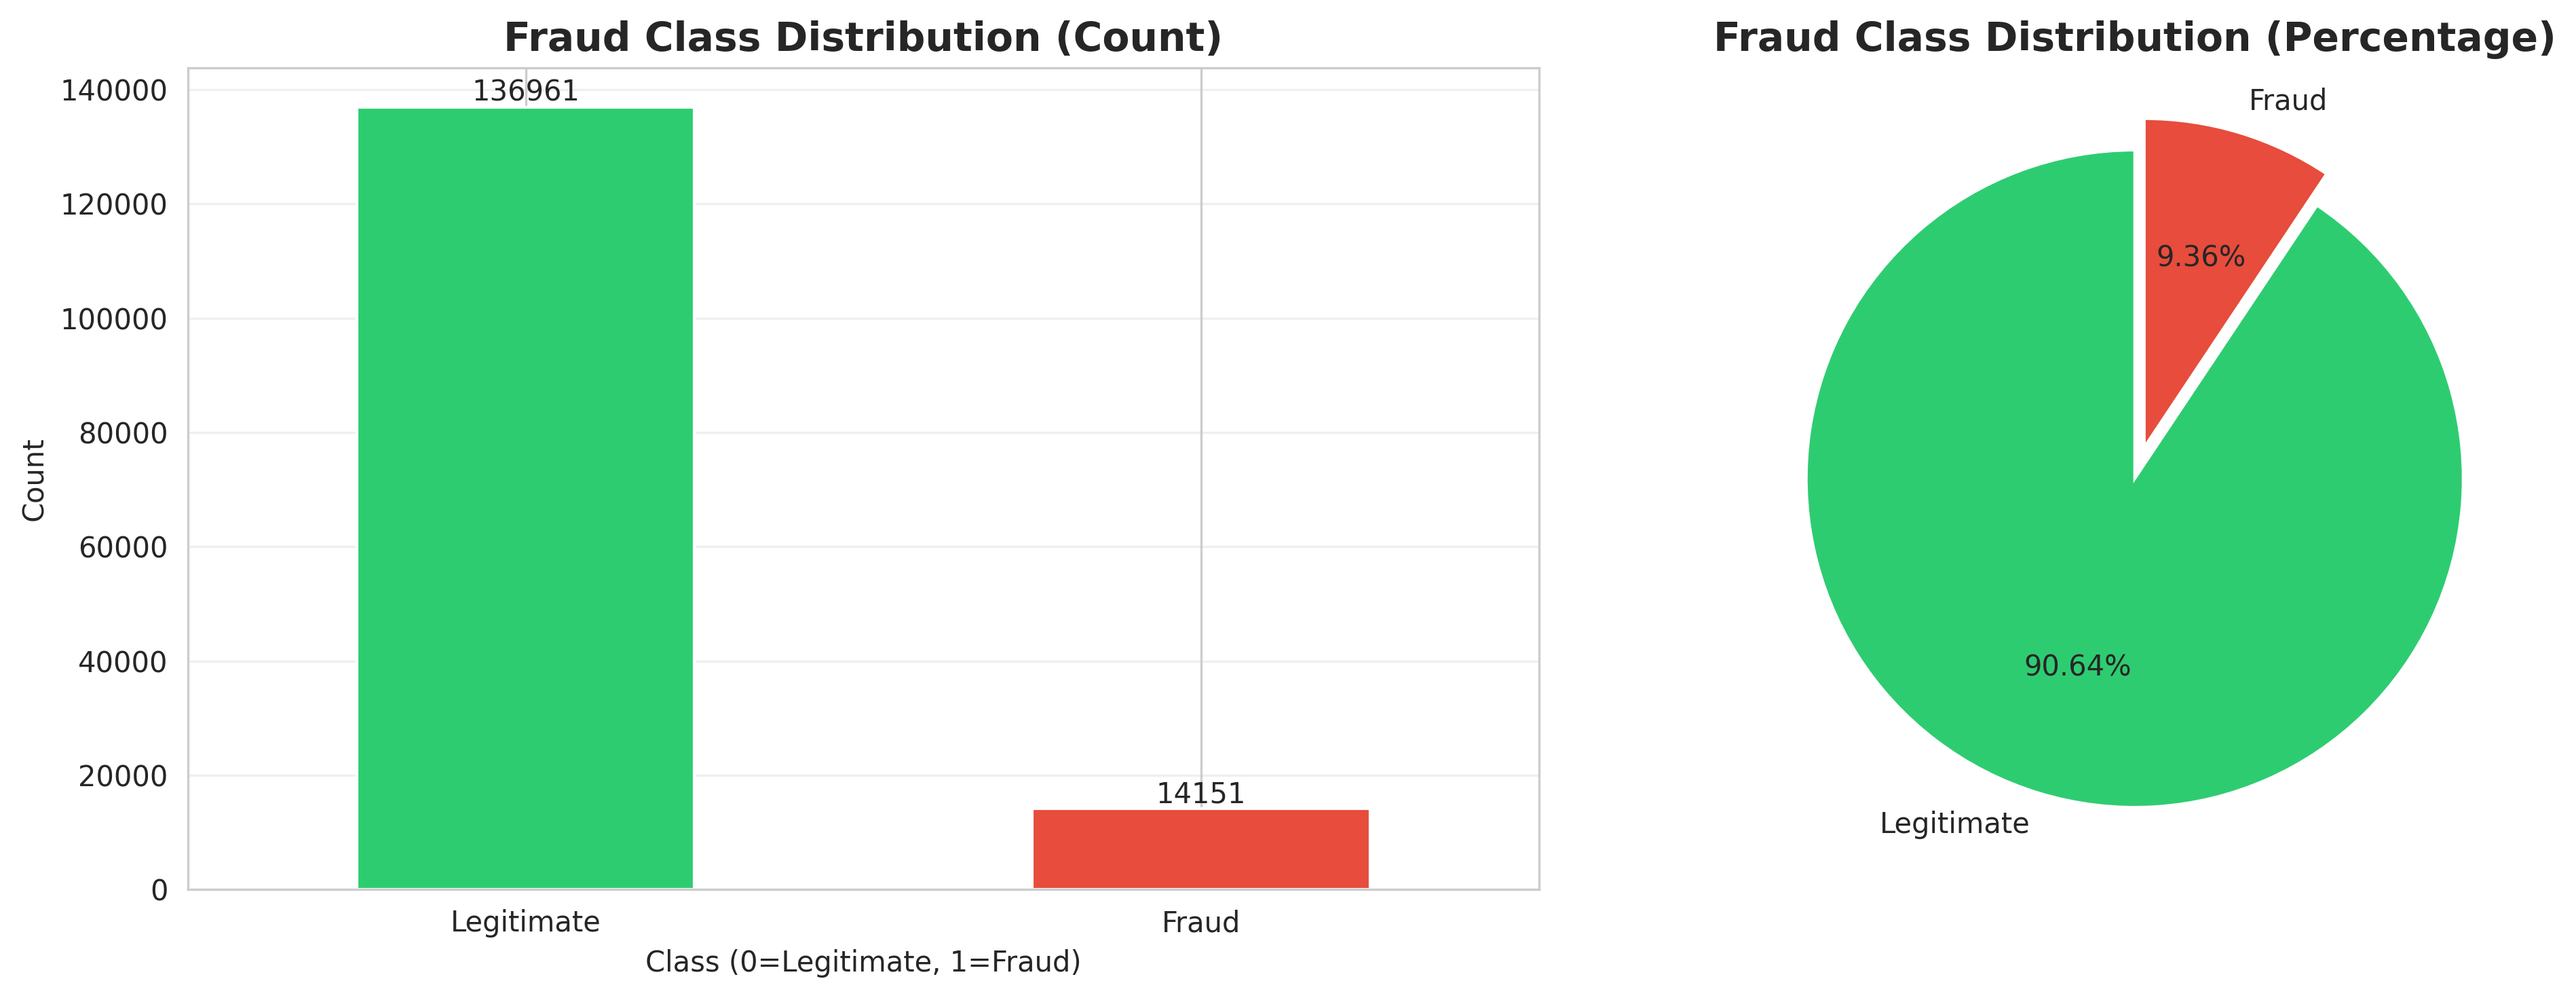

CLASS IMBALANCE ANALYSIS

Class Distribution:
  Legitimate (Class 0): 136,961 transactions (90.64%)
  Fraud      (Class 1): 14,151 transactions (9.36%)

Imbalance Ratio: 9.68:1
  → For every 1 fraudulent transaction, there are 10 legitimate ones


In [9]:
from IPython.display import Image, display

# Analyze class imbalance
imbalance_result = eda.analyze_class_imbalance(save_plot=True)
display(Image(filename=imbalance_result["plot_saved"]))

print("CLASS IMBALANCE ANALYSIS")
print("=" * 70)
print(f"\nClass Distribution:")
print(
    f"  Legitimate (Class 0): {imbalance_result['legitimate_count']:,} transactions ({imbalance_result['legitimate_percentage']:.2f}%)"
)
print(
    f"  Fraud      (Class 1): {imbalance_result['fraud_count']:,} transactions ({imbalance_result['fraud_percentage']:.2f}%)"
)
print(f"\nImbalance Ratio: {imbalance_result['imbalance_ratio']:.2f}:1")
print(
    "  → For every 1 fraudulent transaction, there are {:.0f} legitimate ones".format(
        imbalance_result["imbalance_ratio"]
    )
)

# Display the visualization
plt.show()

### 5.2 Univariate Analysis

Highlights from feature distributions:

- Numerical
  - `purchase_value`: mean 36.94, median 35.00, std 18.32; right-skewed, range 9–154.
  - `age`: mean 33.14, median 33.00, std 8.62; mild right skew; range 18–76.
  - `ip_address`: mean ≈ 2.15e9; very wide spread; near-symmetric skew.
- Categorical
  - `source`: SEO 60,615 (40.1%), Ads 59,881 (39.7%), Direct 30,616 (20.3%).
  - `browser`: Chrome 61,432 (40.7%) dominates; Safari and FireFox ≈ 24–25k each.
  - `sex`: M 88,293 (58.4%), F 62,819 (41.6%).

Plots saved: `reports/images/univariate_numerical.png`, `reports/images/univariate_categorical.png`.


UNIVARIATE ANALYSIS

Analyzing 4 numerical features...

  user_id:
    Mean: 200171.04
    Median: 199958.00
    Std: 115369.29
    Range: [2.00, 400000.00]
    Skewness: 0.00

  purchase_value:
    Mean: 36.94
    Median: 35.00
    Std: 18.32
    Range: [9.00, 154.00]
    Skewness: 0.67

  age:
    Mean: 33.14
    Median: 33.00
    Std: 8.62
    Range: [18.00, 76.00]
    Skewness: 0.43

  ip_address:
    Mean: 2152145330.96
    Median: 2154770162.41
    Std: 1248497030.10
    Range: [52093.50, 4294850499.68]
    Skewness: -0.01

✓ Saved numerical features plot: /home/voldi/Projects/ai-ml/fraud-detection-model/reports/images/univariate_numerical.png

Analyzing 6 categorical features...

  signup_time:
    Unique values: 151112
    Most common: 2015-06-10 07:02:20 (1 occurrences, 0.0%)

  purchase_time:
    Unique values: 150679
    Most common: 2015-07-17 23:22:55 (3 occurrences, 0.0%)

  device_id:
    Unique values: 137956
    Most common: NGQCKIADMZORL (20 occurrences, 0.0%)

  sou

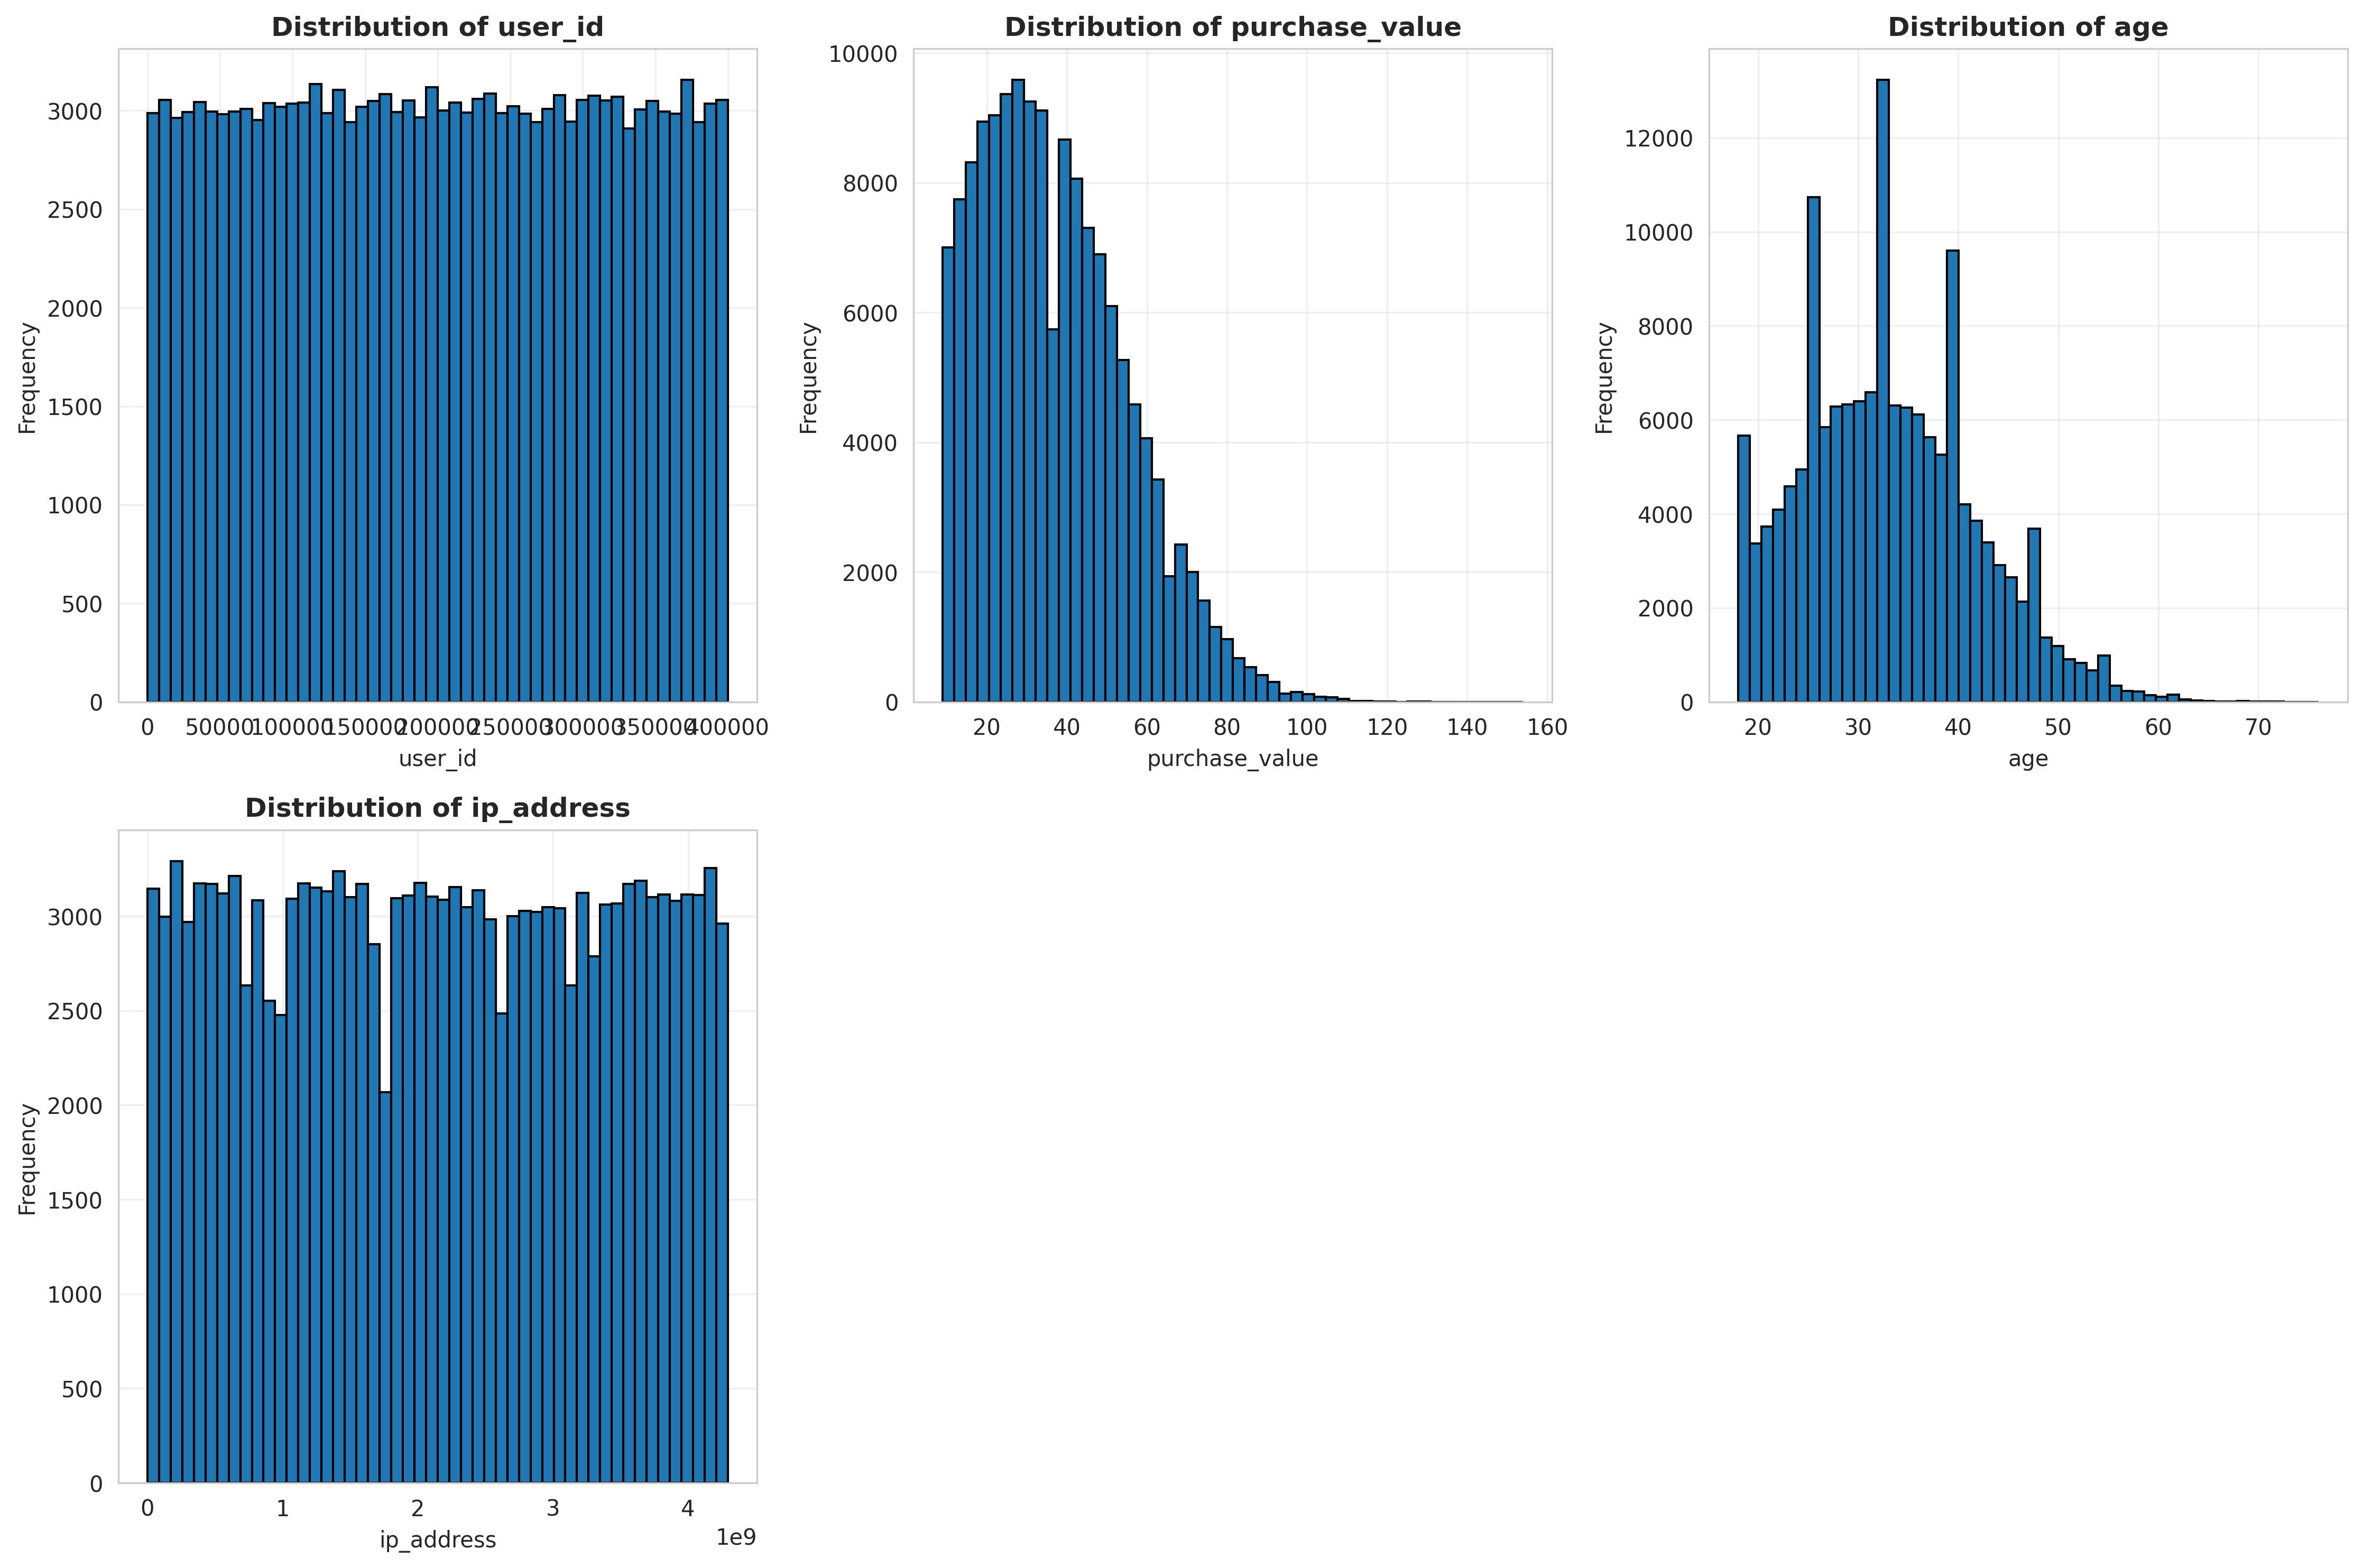

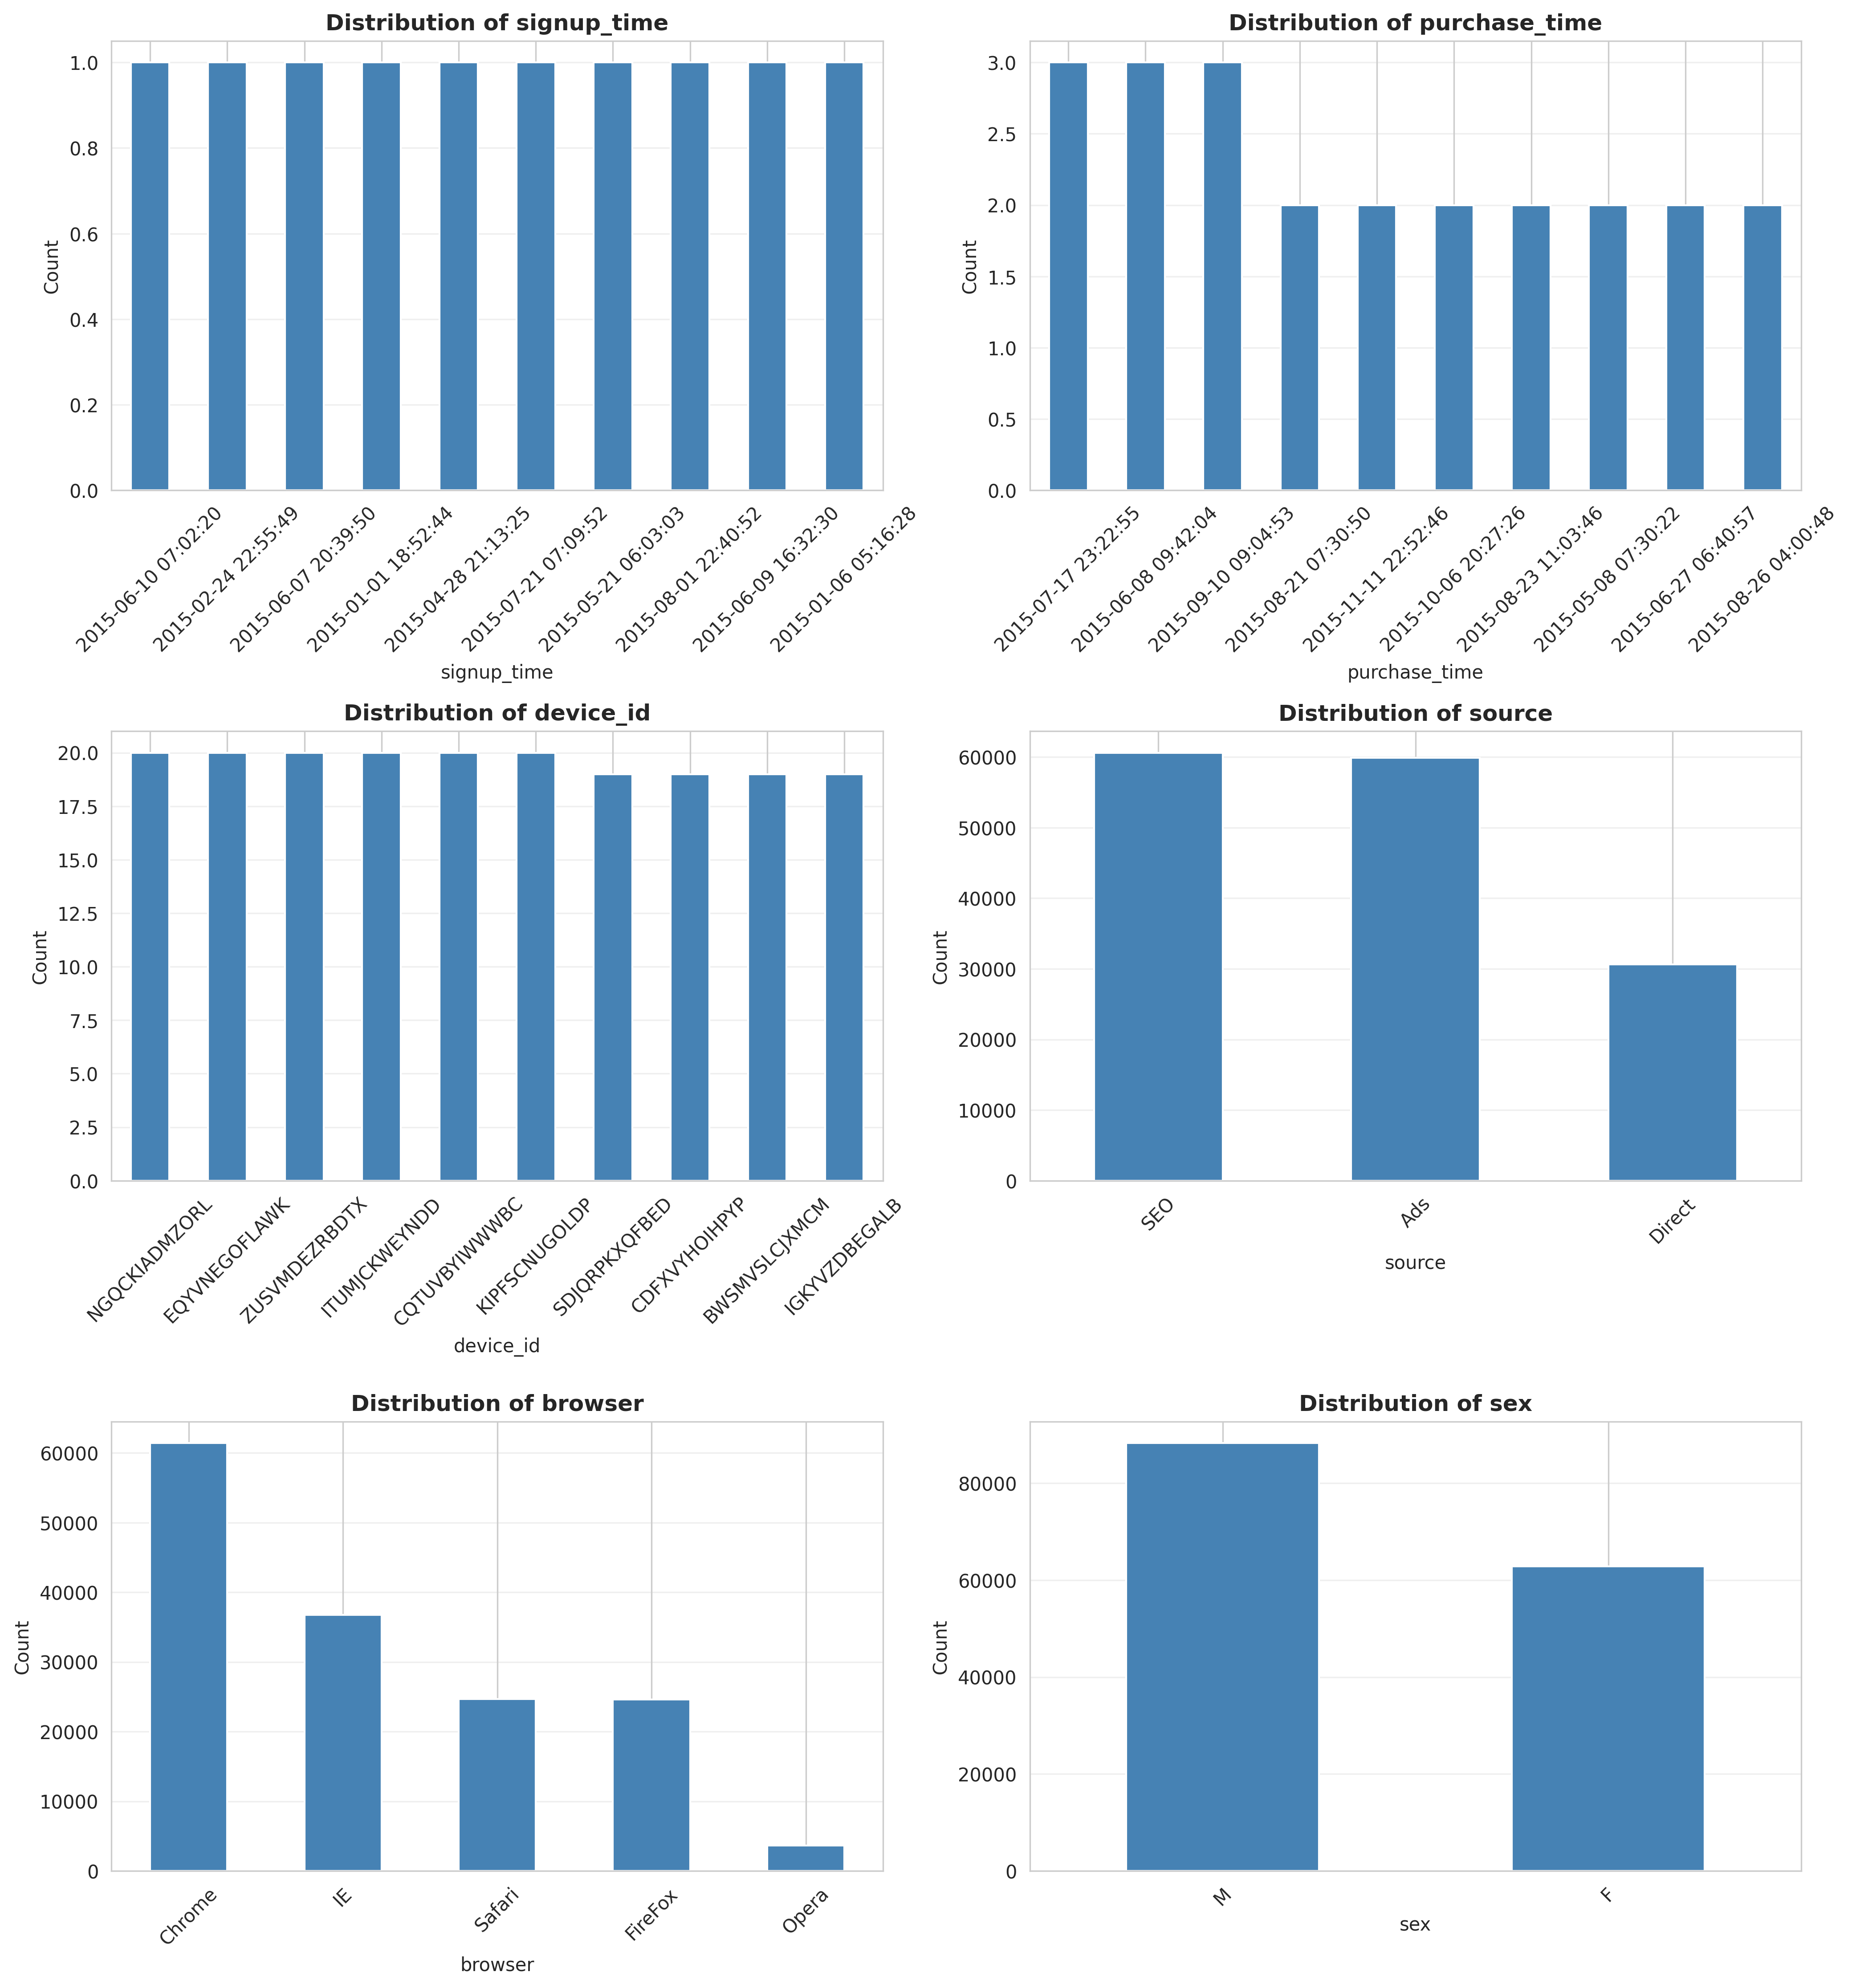

UNIVARIATE ANALYSIS

Numerical Features Summary:
----------------------------------------------------------------------

user_id:
  Mean: 200171.04 | Median: 199958.00
  Std: 115369.29 | Min: 2.00 | Max: 400000.00
  Skewness: 0.00 | Kurtosis: -1.20

purchase_value:
  Mean: 36.94 | Median: 35.00
  Std: 18.32 | Min: 9.00 | Max: 154.00
  Skewness: 0.67 | Kurtosis: 0.14

age:
  Mean: 33.14 | Median: 33.00
  Std: 8.62 | Min: 18.00 | Max: 76.00
  Skewness: 0.43 | Kurtosis: -0.17

ip_address:
  Mean: 2152145330.96 | Median: 2154770162.41
  Std: 1248497030.10 | Min: 52093.50 | Max: 4294850499.68
  Skewness: -0.01 | Kurtosis: -1.21


Categorical Features Summary:
----------------------------------------------------------------------

signup_time:
  Unique values: 151112
  Most common: 2015-06-10 07:02:20 (appears 1 times)

purchase_time:
  Unique values: 150679
  Most common: 2015-07-17 23:22:55 (appears 3 times)

device_id:
  Unique values: 137956
  Most common: NGQCKIADMZORL (appears 20 times

In [10]:
# Perform univariate analysis (auto-detect numerical and categorical features)
univariate_result = eda.univariate_analysis(save_plots=True)
display(Image(filename=univariate_result["plots_saved"][0]))
display(Image(filename=univariate_result["plots_saved"][1]))
print("UNIVARIATE ANALYSIS")
print("=" * 70)

# Numerical features summary
print("\nNumerical Features Summary:")
print("-" * 70)
for feature, stats in univariate_result["numerical_stats"].items():
    print(f"\n{feature}:")
    print(f"  Mean: {stats['mean']:.2f} | Median: {stats['median']:.2f}")
    print(
        f"  Std: {stats['std']:.2f} | Min: {stats['min']:.2f} | Max: {stats['max']:.2f}"
    )
    print(f"  Skewness: {stats['skewness']:.2f} | Kurtosis: {stats['kurtosis']:.2f}")

# Categorical features summary
print("\n\nCategorical Features Summary:")
print("-" * 70)
for feature, stats in univariate_result["categorical_stats"].items():
    print(f"\n{feature}:")
    print(f"  Unique values: {stats['unique_count']}")
    print(
        f"  Most common: {stats['top_value']} (appears {stats['top_value_count']:,} times)"
    )

plt.show()

### 5.3 Bivariate Analysis

Feature–target relationships:

- Numerical vs `class` (correlations are near zero)
  - `user_id`: +0.0019, `purchase_value`: +0.0010, `age`: +0.0066, `ip_address`: −0.0052.
- Categorical fraud rates (top categories)
  - `source`: Direct 10.54% > Ads 9.21% > SEO 8.93%.
  - `browser`: Chrome 9.88%, FireFox 9.52%, Safari 9.02%, Opera 8.92%, IE 8.68%.
  - `sex`: M 9.55%, F 9.10%.

Plots saved: `reports/images/bivariate_numerical.png`, `reports/images/bivariate_categorical.png`.


BIVARIATE ANALYSIS

Analyzing 4 numerical features vs fraud...
  user_id: correlation = 0.0019
  purchase_value: correlation = 0.0010
  age: correlation = 0.0066
  ip_address: correlation = -0.0052

✓ Saved numerical bivariate plot: /home/voldi/Projects/ai-ml/fraud-detection-model/reports/images/bivariate_numerical.png

Analyzing 6 categorical features vs fraud...

  signup_time - Top 5 fraud rates:
    2015-08-18 04:31:11: 100.00% (1/1)
    2015-08-18 03:25:36: 100.00% (1/1)
    2015-01-01 00:12:19: 100.00% (1/1)
    2015-01-01 00:12:18: 100.00% (1/1)
    2015-01-01 00:12:17: 100.00% (1/1)

  purchase_time - Top 5 fraud rates:
    2015-01-01 00:00:51: 100.00% (1/1)
    2015-01-01 00:00:52: 100.00% (1/1)
    2015-01-01 00:00:44: 100.00% (1/1)
    2015-01-01 00:00:45: 100.00% (1/1)
    2015-01-01 00:00:46: 100.00% (1/1)

  device_id - Top 5 fraud rates:
    ZZQBRNNATFEIW: 100.00% (1/1)
    AZEVNCBGICKDR: 100.00% (1/1)
    AZZLCBJLPGRBI: 100.00% (1/1)
    BAGDZEFHKRGSI: 100.00% (1/1)
  

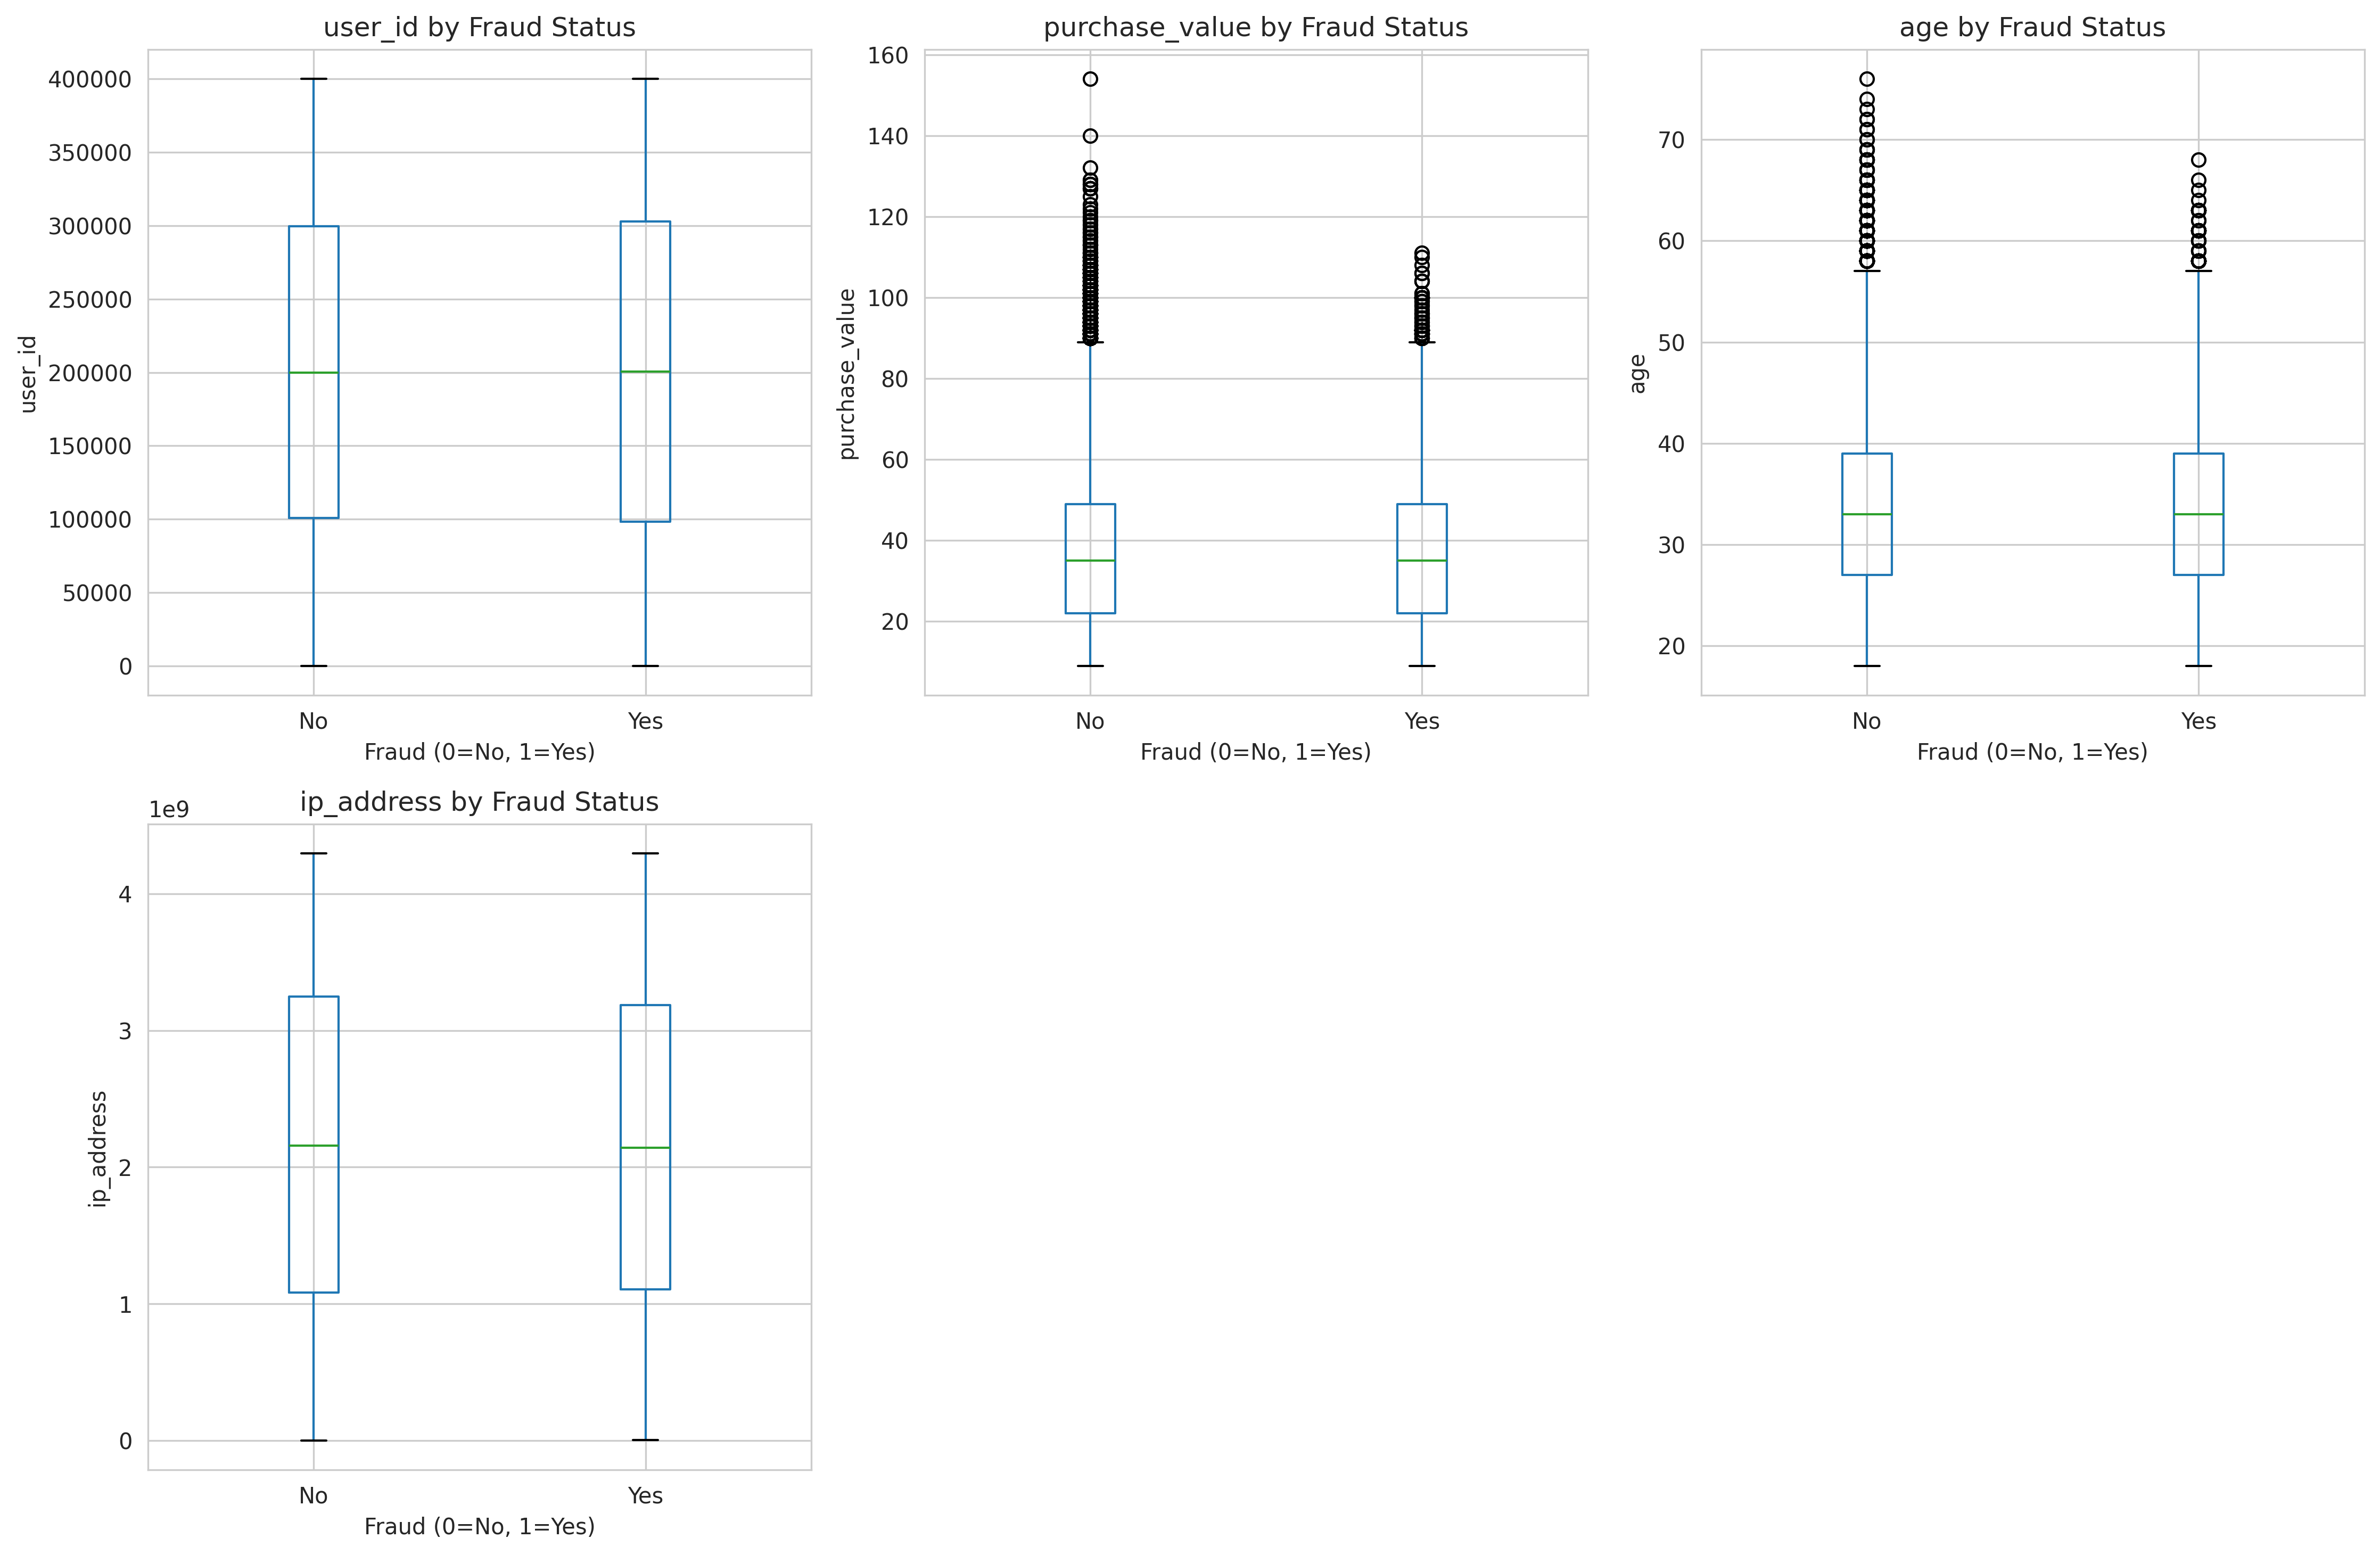

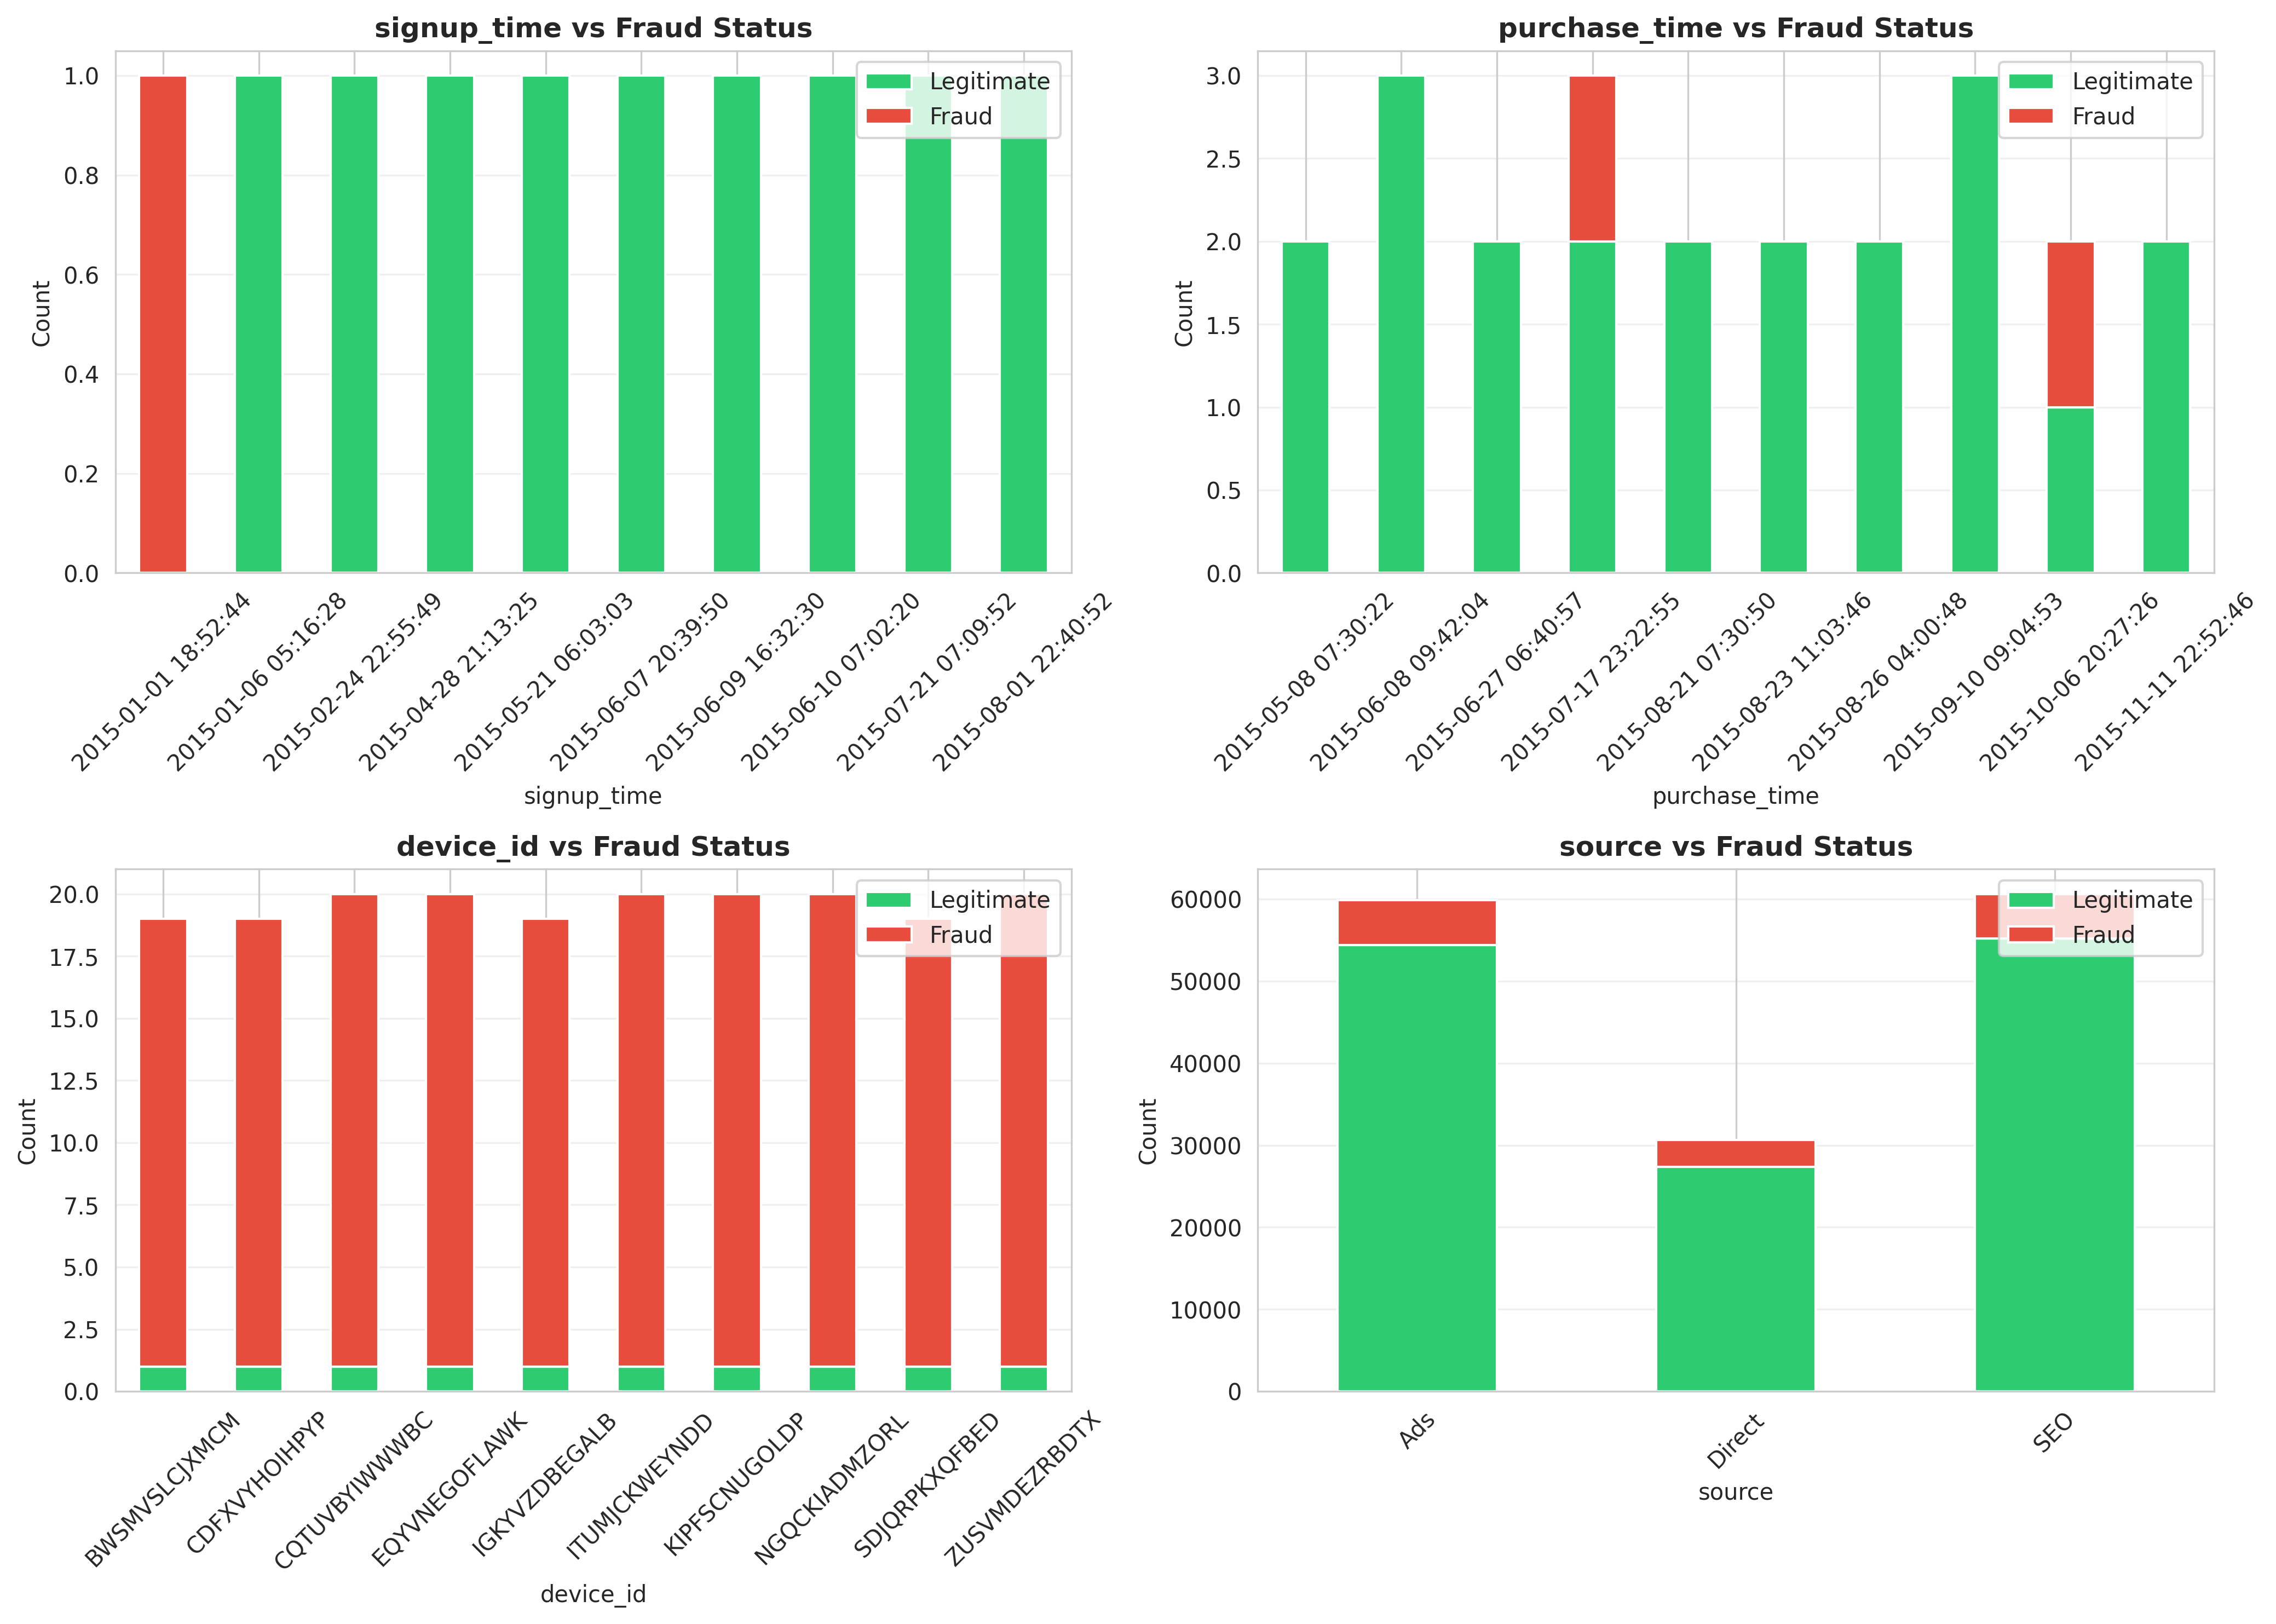

BIVARIATE ANALYSIS (Feature-Target Relationships)

Numerical Features - Correlation with Fraud:
----------------------------------------------------------------------
user_id             : +0.0019
purchase_value      : +0.0010
age                 : +0.0066
ip_address          : -0.0052


Categorical Features - Fraud Rates:
----------------------------------------------------------------------

signup_time:

purchase_time:

device_id:

source:

browser:

sex:


In [11]:
# Perform bivariate analysis
bivariate_result = eda.bivariate_analysis(save_plots=True)
display(Image(filename=bivariate_result["plots_saved"][0]))
display(Image(filename=bivariate_result["plots_saved"][1]))

print("BIVARIATE ANALYSIS (Feature-Target Relationships)")
print("=" * 70)

# Numerical features correlation with target
print("\nNumerical Features - Correlation with Fraud:")
print("-" * 70)
for feature, corr in bivariate_result["correlations"].items():
    print(f"{feature:20s}: {corr:+.4f}")

# Categorical features fraud rates
print("\n\nCategorical Features - Fraud Rates:")
print("-" * 70)
for feature, rates in bivariate_result["fraud_rates"].items():
    print(f"\n{feature}:")
    # Only print if the value is a float (fraud rate), skip if it's a dict (like 'fraud_count')
    count = 0
    for category, rate in rates.items():
        if isinstance(rate, (float, int, np.floating, np.integer)):
            print(f"  {str(category):30s}: {rate:.2%}")
            count += 1
        if count >= 5:
            break
    if len(rates) > 5:
        print(f"  ... and {len(rates) - 5} more categories")

plt.show()

### 5.4 Temporal Analysis

Fraud rate varies over time:

- Top hours: 17:00 (10.75%), 09:00 (10.58%), 08:00 (10.15%).
- Lowest hour: ~20:00 (8.18%).
- By day of week: highest on Friday (10.18%), then Sunday (10.09%) and Saturday (9.93%); lowest on Tuesday (7.83%) and Wednesday (8.03%).

Plot saved: `reports/images/temporal_patterns.png`.


TEMPORAL ANALYSIS

Fraud Rate by Hour of Day:
  Hour  Fraud Rate  Total Transactions
  00:00    8.94%      6,186
  01:00    8.99%      6,228
  02:00    9.20%      6,338
  03:00    9.51%      6,458
  04:00    8.30%      6,050
  05:00    8.98%      6,189
  06:00    9.31%      6,380
  07:00    8.82%      6,181
  08:00   10.15%      6,387
  09:00   10.58%      6,418
  10:00    9.97%      6,100
  11:00    8.91%      6,327
  12:00    9.43%      6,403
  13:00    9.08%      6,292
  14:00    9.52%      6,355
  15:00    9.91%      6,369
  16:00    9.87%      6,309
  17:00   10.75%      6,466
  18:00    9.56%      6,252
  19:00    9.68%      6,299
  20:00    8.18%      6,221
  21:00    9.11%      6,224
  22:00    8.54%      6,358
  23:00    9.32%      6,322

Fraud Rate by Day of Week:
  Day        Fraud Rate  Total Transactions
  Monday       9.62%     21,711
  Tuesday      7.83%     21,314
  Wednesday    8.03%     21,316
  Thursday     9.82%     21,586
  Friday      10.18%     21,522
  Saturday

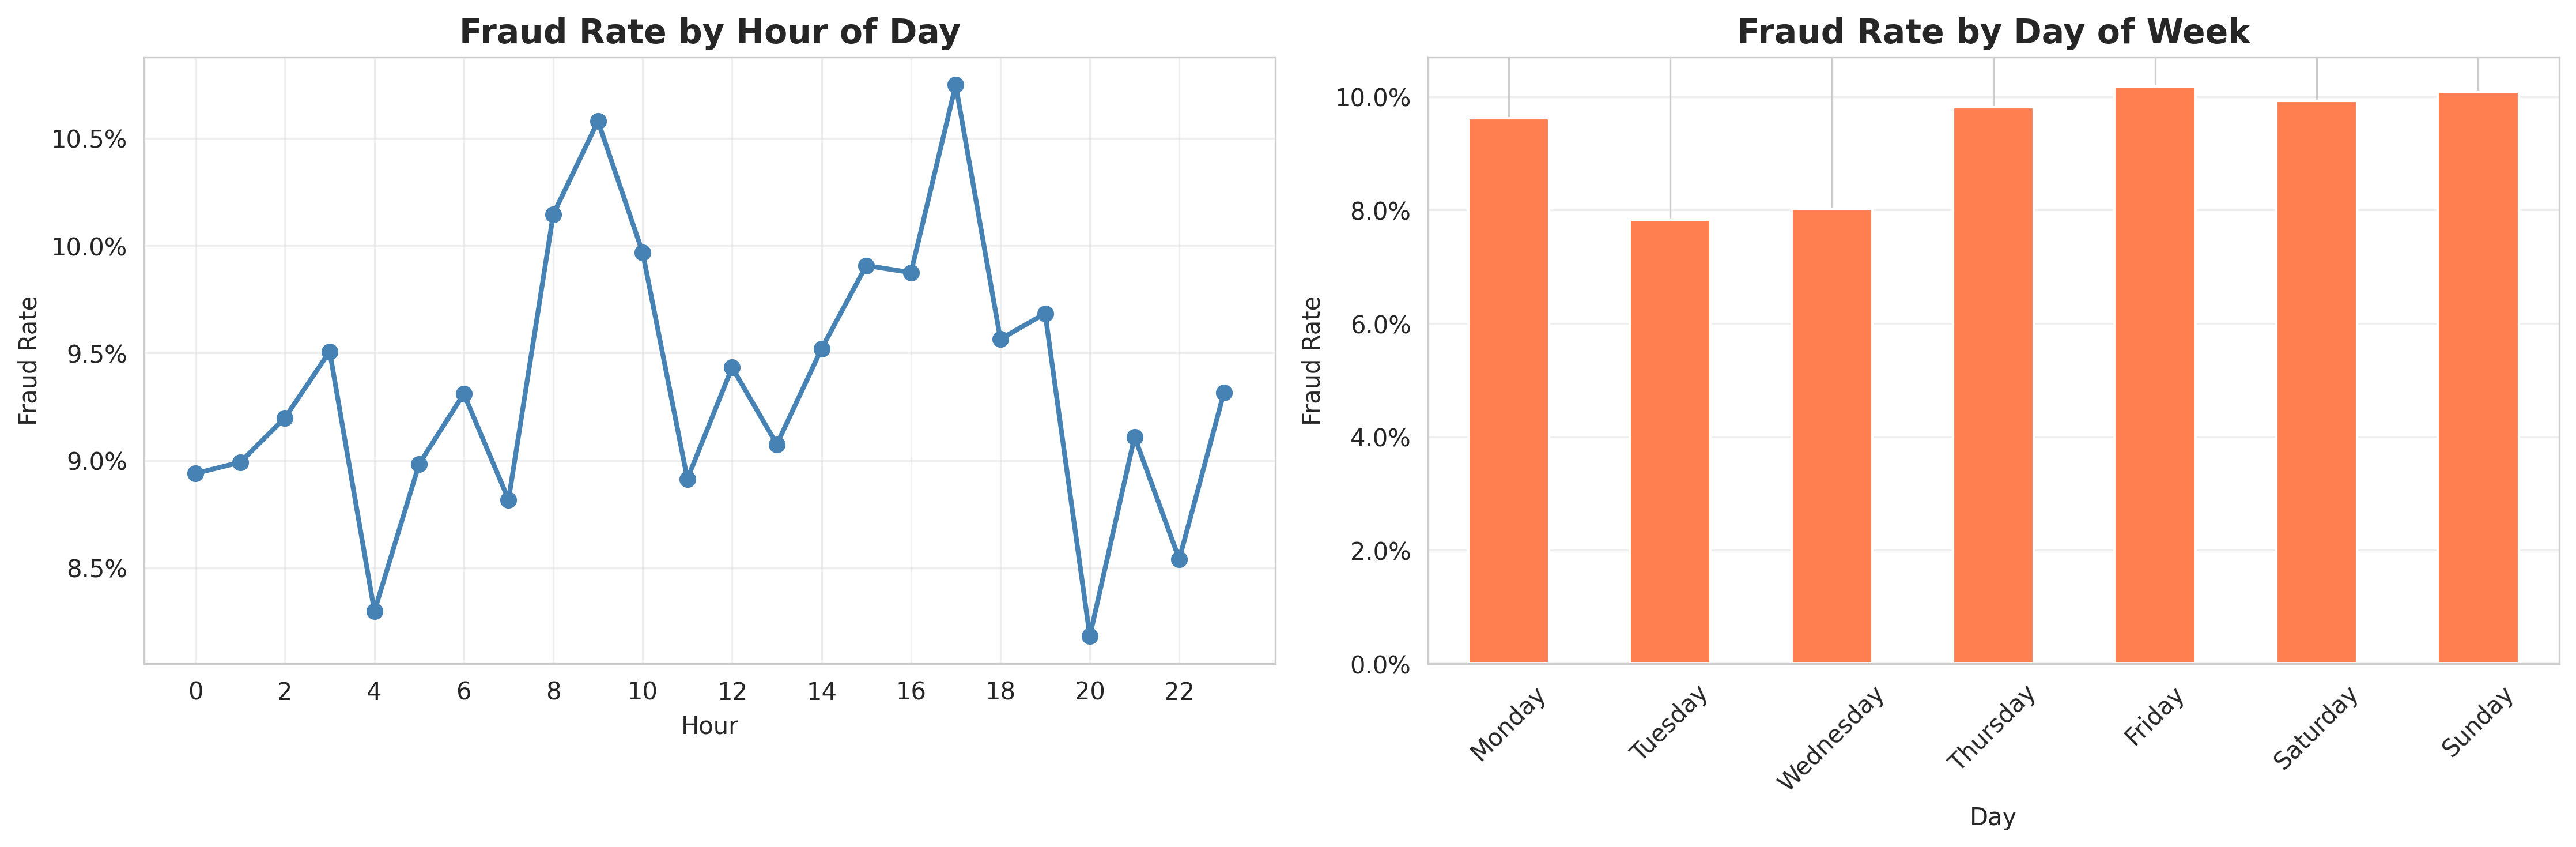

In [12]:
# Perform temporal analysis on purchase time
temporal_result = eda.temporal_analysis(time_column="purchase_time", save_plot=True)

print("TEMPORAL ANALYSIS")
print("=" * 70)

display(Image(filename=temporal_result["plots_saved"][0]))


plt.show()

### 5.5 Categorical Feature Analysis

Deep dive into categorical features and their relationship with fraud.


CATEGORICAL FEATURES ANALYSIS


Analyzing source:
  Unique values: 3

  Top 5 categories by fraud rate:
    Direct: 10.54% (3226/30616 transactions)
    Ads: 9.21% (5513/59881 transactions)
    SEO: 8.93% (5412/60615 transactions)

Analyzing browser:
  Unique values: 5

  Top 5 categories by fraud rate:
    Chrome: 9.88% (6069/61432 transactions)
    FireFox: 9.52% (2342/24610 transactions)
    Safari: 9.02% (2225/24667 transactions)
    Opera: 8.92% (328/3676 transactions)
    IE: 8.68% (3187/36727 transactions)

Analyzing sex:
  Unique values: 2

  Top 5 categories by fraud rate:
    M: 9.55% (8434/88293 transactions)
    F: 9.10% (5717/62819 transactions)



✓ Saved categorical features analysis plot: /home/voldi/Projects/ai-ml/fraud-detection-model/reports/images/categorical_features_analysis.png


CATEGORICAL FEATURE ANALYSIS


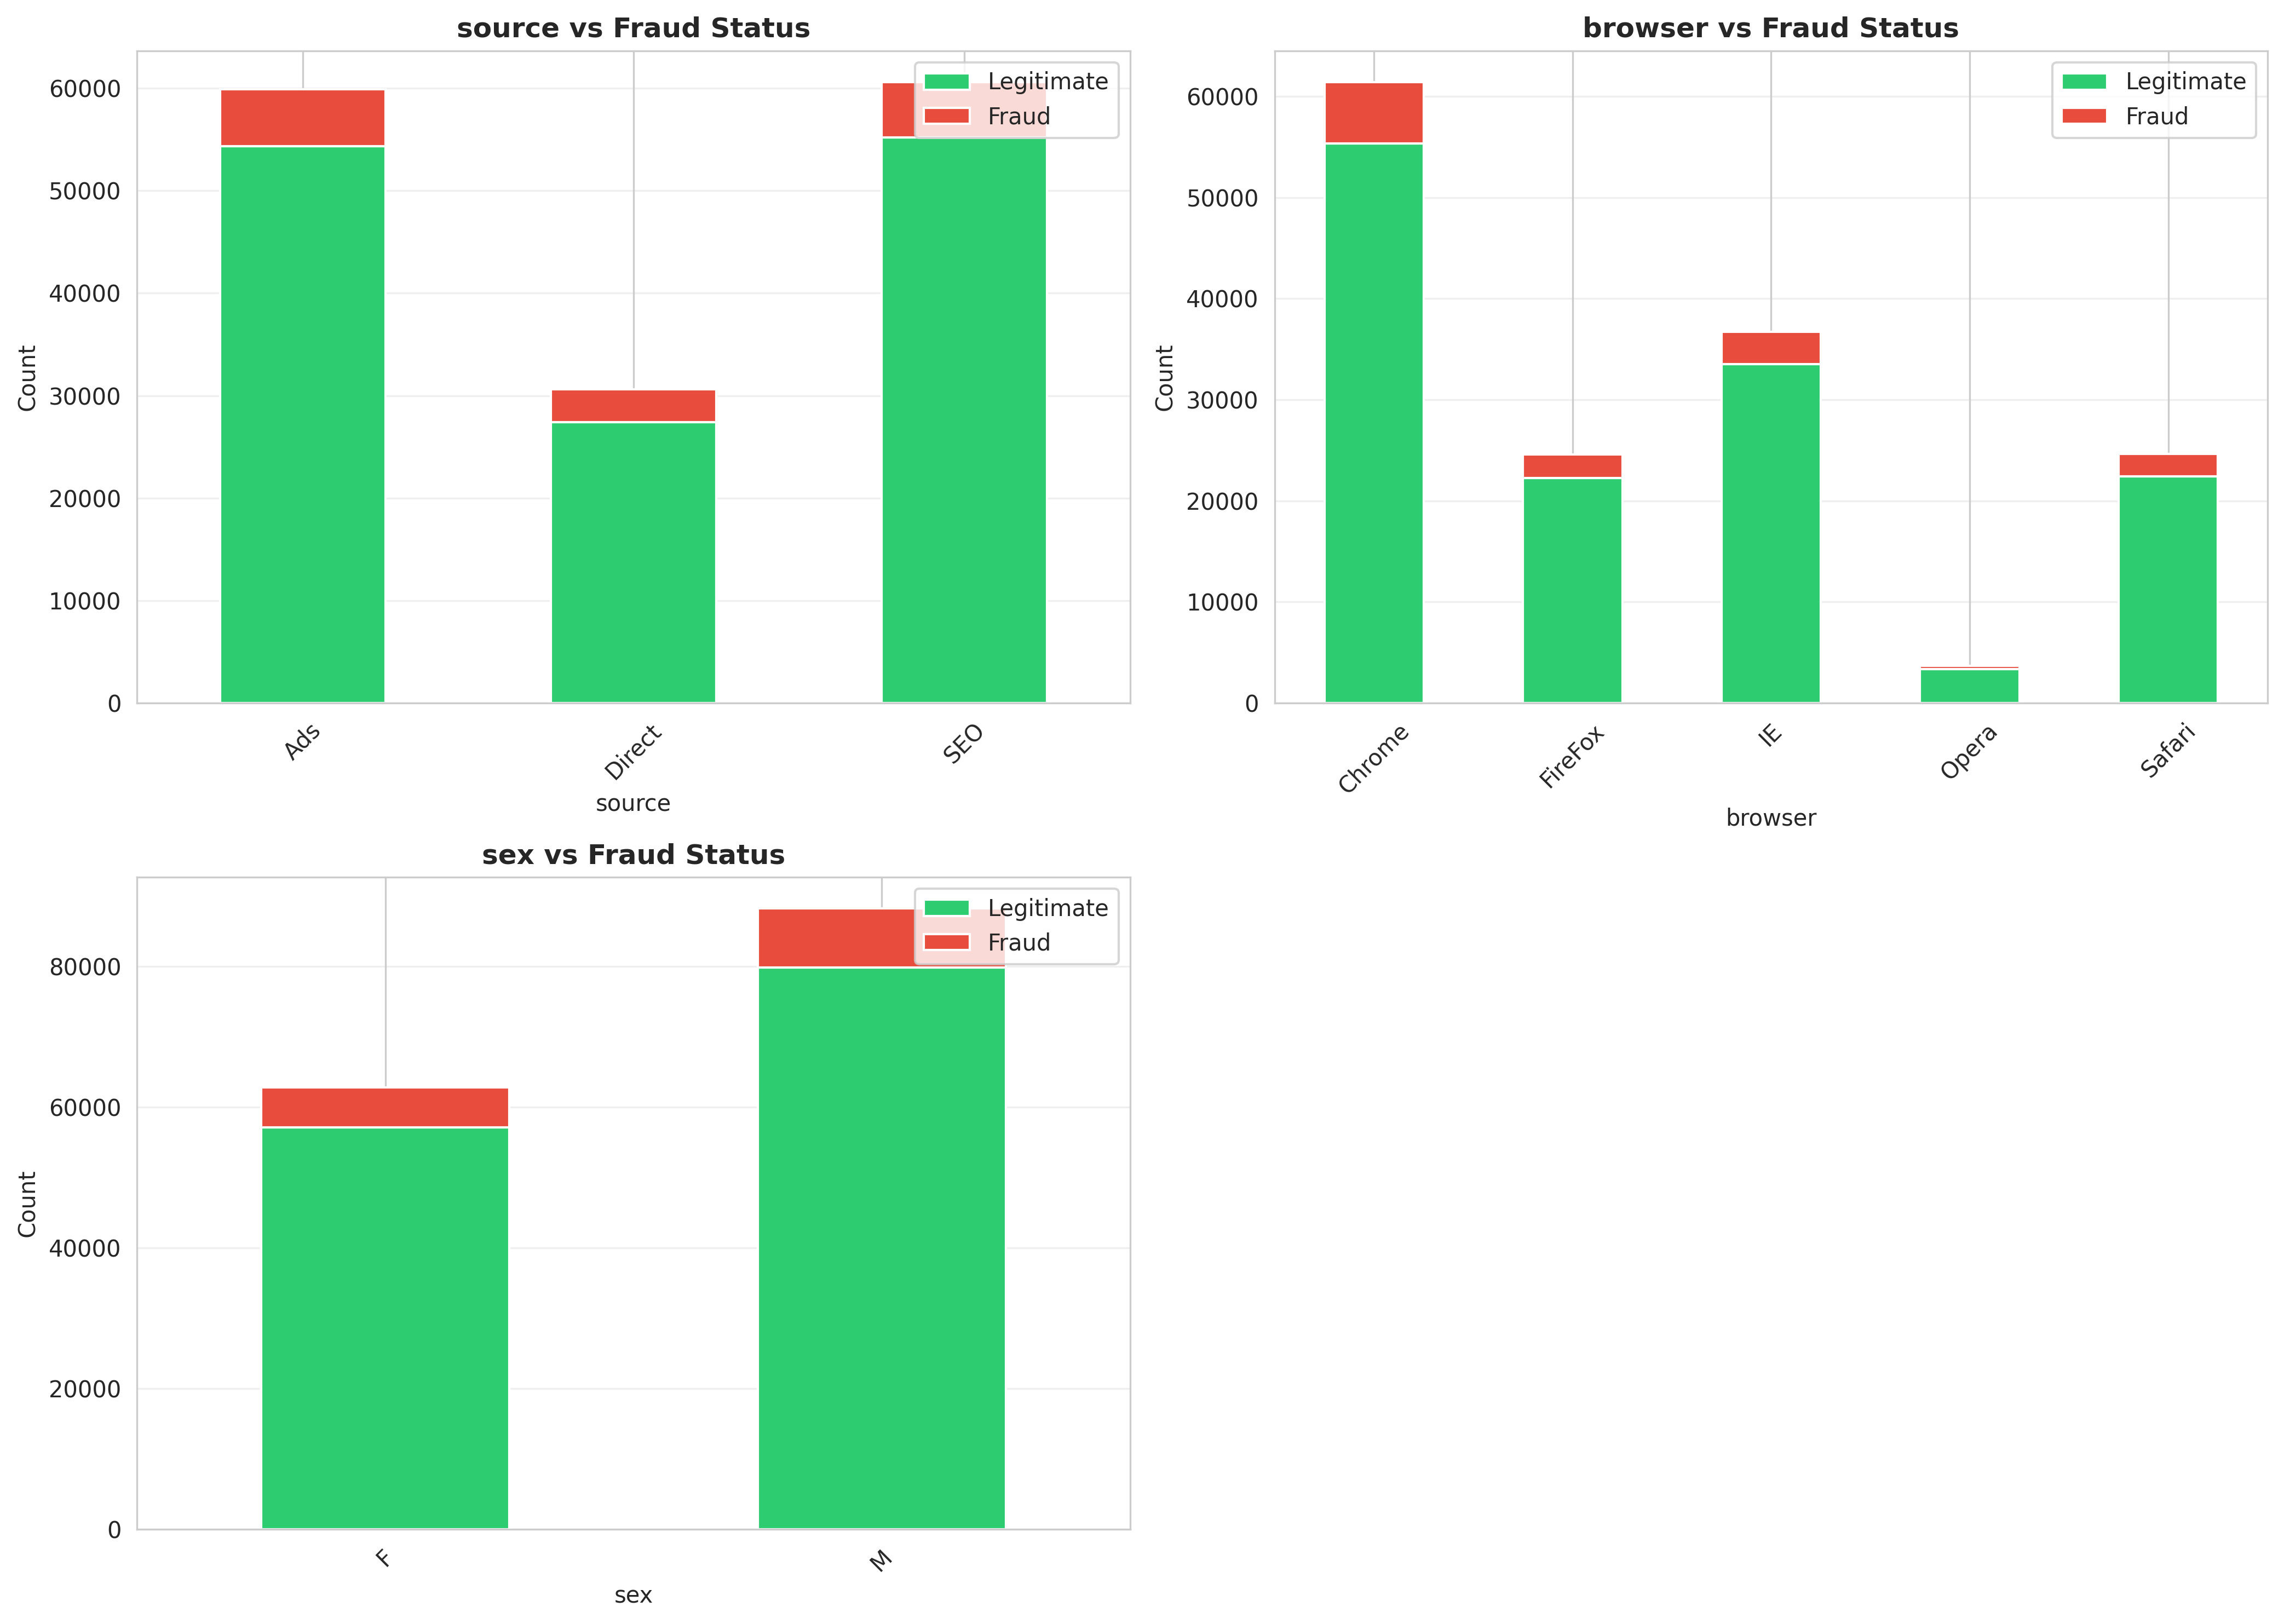

In [15]:
# Analyze specific categorical features
categorical_features = ["source", "browser", "sex"]
categorical_result = eda.categorical_analysis(
    features=categorical_features, save_plot=True
)

print("CATEGORICAL FEATURE ANALYSIS")
print("=" * 70)

display(Image(filename=categorical_result["plot_saved"]))

plt.show()

## 6. EDA Summary Report

Generate a comprehensive summary of all analyses performed.

In [16]:
# Generate comprehensive EDA report
eda_report = eda.generate_eda_report()


EDA REPORT SUMMARY

Dataset: 151,112 rows × 14 columns
Target column: class
Output directory: /home/voldi/Projects/ai-ml/fraud-detection-model/reports/images

Analyses completed:
  ✓ Class Imbalance
  ✓ Univariate Analysis
  ✓ Bivariate Analysis
  ✓ Temporal Analysis
  ✓ Categorical Analysis

Class Imbalance:
  Fraud: 14,151 (9.36%)
  Legitimate: 136,961 (90.64%)
  Imbalance Ratio: 9.68:1

Visualizations created: 5




## 7. Key Findings and Next Steps

### Key Findings (from executed analysis)

- Class imbalance: 9.68:1 (90.64% legitimate, 9.36% fraud; 136,961 vs 14,151 of 151,112 total).
- Temporal patterns: fraud peaks at 17:00 (10.75%) and is lowest around 20:00 (8.18%); Friday has the highest fraud rate (10.18%), Tuesday the lowest (7.83%).
- Categorical patterns: `Direct` source shows the highest fraud rate (10.54%), and `Chrome` users have the highest rate among browsers (9.88%). `M` has a slightly higher rate than `F` (9.55% vs 9.10%).
- Numerical features: `purchase_value` is right‑skewed (mean 36.94), `age` is centered around 33, and correlations of numerical features with fraud are near zero, suggesting non‑linear relationships.

